## 목표: 1. 와인 속성 분석 2. 품질 등급 예측
### 데이터 출처: UC Irvine Machine Learning Repository
### 분석 방법: 선형 회귀모델, t-검정
### 시각화: KDE(커널 밀도 추정 히스토그램)

In [27]:
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import levene, ttest_ind

In [40]:
# 레드와인 csv 파일 불러오기
red_df = pd.read_csv('C:/Data/winequality-red.csv', sep = ';', header=0, engine='python')
print(red_df.head())
print(red_df.info())   # 데이터 수: 1599

# 화이트와인 csv 파일 불러오기
white_df = pd.read_csv('C:/Data/winequality-white.csv', sep = ';', header=0, engine='python')
print(white_df.head())
print(white_df.info())  # 데이터 수: 4898

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [41]:
# 두 데이터 병합
## '와인 종류' 열 추가
red_df.insert(0, column='type', value= 0)
print(red_df.head())
white_df.insert(0, column='type', value= 1)
print(white_df.head())

wine_df = pd.concat([red_df, white_df])
print(wine_df)

   type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.4              0.70         0.00             1.9   
1     0            7.8              0.88         0.00             2.6   
2     0            7.8              0.76         0.04             2.3   
3     0           11.2              0.28         0.56             1.9   
4     0            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65     

In [51]:
# 컬럼명 공백 제거
wine_df.columns = wine_df.columns.str.replace(' ', '_')

wine_df.describe()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [53]:
# 와인 퀄리티별 데이터 수
wine_df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [54]:
# t 검정 : 그룹 간 차이 확인

## 1. 등분산 확인
stat, p = levene(red_df.quality, white_df.quality)
print('통계량: ', stat)
print('p-value: ', p)       # p-value: 0.127 -> 등분산성 불만족

##2. ttest 실행
statistic, pvalue = ttest_ind(red_df.quality, white_df.quality, equal_var=False)  
if pvalue < 0.05:
    print("두 그룹 간의 차이 존재")
else:
    print("두 그룹 간의 차이 없음")

통계량:  2.3327077520087762
p-value:  0.1267300410918103
두 그룹 간의 차이 존재


In [58]:
# 회귀분석
formula = 'quality ~ type + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + \
            chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'
reg_result = smf.ols(formula, data = wine_df).fit()
reg_result.summary()    # citric_acid의 p값: 0.432 -> 유의미하지 않음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 29 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:34:26   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              104.7518     14.136      7.411      0.000      77.041     132.462
type                    -0.3613      0.057     -6.367      0.000      -0.473      -0.250
fixed_acidity            0.0851      0.016      5.396      0.000       0.054       0.116
volatile_acidity        -1.4924      0.081    -18.345      0.000      -1.652      -1.333
citric_acid             -0.0626      0.080     -0.786      0.432      -0.219       0.094
residual_sugar           0.0624      0.006     10.522      0.000       0.051       0.074
chlorides               -0.7573      0.334     -2.264      0.024      -1.413      -0.102
free_sulfur_dioxide      0.0049      0.001      6.443      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -4.333      0.000      -0.002      -0.001
density               -103.9096     14.336     -7.248      0.000    -132.013     -75.806
pH                       0.4988      0.091      5.506      0.000       0.321       0.676
sulphates                0.7217      0.076      9.466      0.000       0.572       0.871
alcohol                  0.2227      0.018     12.320      0.000       0.187       0.258
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# 다중공선성 확인
## 1. 변수 간 상관관계 확인
wine_corr = wine_df.corr(method = 'pearson')  # pearson: 변수간 선형관계 정도 확인
print(wine_corr)

                          type  fixed_acidity  volatile_acidity  citric_acid  \
type                  1.000000      -0.486740         -0.653036     0.187397   
fixed_acidity        -0.486740       1.000000          0.219008     0.324436   
volatile_acidity     -0.653036       0.219008          1.000000    -0.377981   
citric_acid           0.187397       0.324436         -0.377981     1.000000   
residual_sugar        0.348821      -0.111981         -0.196011     0.142451   
chlorides            -0.512678       0.298195          0.377124     0.038998   
free_sulfur_dioxide   0.471644      -0.282735         -0.352557     0.133126   
total_sulfur_dioxide  0.700357      -0.329054         -0.414476     0.195242   
density              -0.390645       0.458910          0.271296     0.096154   
pH                   -0.329129      -0.252700          0.261454    -0.329808   
sulphates            -0.487218       0.299568          0.225984     0.056197   
alcohol               0.032970      -0.0

In [76]:
### 2차원 -> 1차원 변경
vals = wine_corr.values.flatten()
filtered = list(filter(lambda x: 0.6 <= x <= 0.8, vals))
print(sorted(filtered, reverse=True))   
# 상관관계 높은 변수 짝: (total_sulfur_dioxide - free_sulfur_dioxide), (total_sulfur_dioxide - type) -> total_sulfur_dioxide의 다중공선성 의심

[np.float64(0.720934081378524), np.float64(0.720934081378524), np.float64(0.7003571552968018), np.float64(0.7003571552968018)]


In [61]:
## 2. VIF 값 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = wine_df[['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
x = add_constant(x)

vif_df = pd.DataFrame()
vif_df['variable'] = x.columns                    # index = 독립변수 
vif_df['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]    # 독립변수 별 vif 값 기록
print(vif_df)   # total_sulfur_dioxide의 vif값: 4.045899e+00 , residual_sugar의 vif 값: 9.634653e+00 -> 다중공선성 의심

                variable           VIF
0                  const  2.415514e+06
1                   type  7.224467e+00
2          fixed_acidity  5.048348e+00
3       volatile_acidity  2.168159e+00
4            citric_acid  1.622151e+00
5         residual_sugar  9.634653e+00
6              chlorides  1.659342e+00
7    free_sulfur_dioxide  2.235693e+00
8   total_sulfur_dioxide  4.045899e+00
9                density  2.233722e+01
10                    pH  2.563776e+00
11             sulphates  1.555807e+00
12               alcohol  5.616857e+00


In [78]:
# 'total_sulfur_dioxide' 변수를 제거한 회귀 모델 재구축
formula2 = 'quality ~ type + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + \
            chlorides + free_sulfur_dioxide + density + pH + sulphates + alcohol'
reg_result2 = smf.ols(formula2, data = wine_df).fit()
reg_result2.summary()   # r2값 감소 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     246.1
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:52:26   Log-Likelihood:                -7204.6
No. Observations:                6497   AIC:                         1.443e+04
Df Residuals:                    6485   BIC:                         1.451e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             114.0747     13.990      8.154      0.000      86.650     141.500
type                   -0.4900      0.048    -10.120      0.000      -0.585      -0.395
fixed_acidity           0.0916      0.016      5.827      0.000       0.061       0.122
volatile_acidity       -1.5523      0.080    -19.337      0.000      -1.710      -1.395
citric_acid            -0.0954      0.079     -1.201      0.230      -0.251       0.060
residual_sugar          0.0645      0.006     10.894      0.000       0.053       0.076
chlorides              -0.7118      0.335     -2.126      0.034      -1.368      -0.056
free_sulfur_dioxide     0.0030      0.001      4.811      0.000       0.002       0.004
density              -113.3611     14.188     -7.990      0.000    -141.175     -85.547
pH                      0.5123      0.091      5.652      0.000       0.335       0.690
sulphates               0.6980      0.076      9.166      0.000       0.549       0.847
alcohol                 0.2238      0.018     12.365      0.000       0.188       0.259
==============================================================================
Omnibus:                      135.309   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.006
Skew:                           0.023   Prob(JB):                     8.72e-65
Kurtosis:                       4.043   Cond. No.                     8.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# 'residual_sugar' 변수를 제거한 회귀 모델 재구축
formula2 = 'quality ~ type + fixed_acidity + volatile_acidity + citric_acid + total_sulfur_dioxide + \
            chlorides + free_sulfur_dioxide + density + pH + sulphates + alcohol'
reg_result2 = smf.ols(formula2, data = wine_df).fit()
reg_result2.summary()   # r2값 감소 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:56:46   Log-Likelihood:                -7250.2
No. Observations:                6497   AIC:                         1.452e+04
Df Residuals:                    6485   BIC:                         1.461e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -31.5026      5.715     -5.512      0.000     -42.706     -20.299
type                    -0.0629      0.050     -1.270      0.204      -0.160       0.034
fixed_acidity           -0.0318      0.011     -2.817      0.005      -0.054      -0.010
volatile_acidity        -1.5601      0.082    -19.077      0.000      -1.720      -1.400
citric_acid             -0.0855      0.080     -1.064      0.287      -0.243       0.072
total_sulfur_dioxide    -0.0017      0.000     -5.160      0.000      -0.002      -0.001
chlorides               -1.2092      0.334     -3.615      0.000      -1.865      -0.554
free_sulfur_dioxide      0.0061      0.001      8.028      0.000       0.005       0.008
density                 34.5907      5.727      6.040      0.000      23.364      45.817
pH                      -0.0804      0.073     -1.108      0.268      -0.223       0.062
sulphates                0.5341      0.075      7.144      0.000       0.388       0.681
alcohol                  0.3619      0.012     29.163      0.000       0.338       0.386
==============================================================================
Omnibus:                      141.580   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.809
Skew:                           0.033   Prob(JB):                     7.20e-69
Kurtosis:                       4.075   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 다중공선성 의심되는 변수 제거 시 모델의 r2값 감소 -> 단순히 변수 제거만으로 모델 성능 향상 불가
### 고려해볼 점: 스케일링, 비선형적 영향

In [91]:
# 스케일링 후 선형회귀분석
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


# 회귀모델 구축 단계에서 'pH'변수의 에러 -> 변수명 소문자 변경
wine_df.columns = wine_df.columns.str.lower()
print(wine_df.columns)

# 독립변수 x 스케일링
x = wine_df.drop(columns = 'quality')
y = wine_df.quality
x_scaled = scaler.fit_transform(x)

# 스케일링한 변수들 -> 다시 데이터프레임으로 만들기
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
scaled_df = pd.concat([x_scaled_df, y.reset_index(drop=True)], axis=1)

formula = 'quality ~' + '+'.join(x.columns)
model = smf.ols(formula, data=scaled_df).fit()

print(model.summary())          # citric_acid의 p값 : 0.432(유의하지 않음), coef: -0.0091(영향력 적음)  -> 제거 고려



Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:06:49   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust           

In [93]:
# 독립변수 x 스케일링
x2 = wine_df.drop(columns = ['quality','citric_acid'])
y = wine_df.quality
x_scaled2 = scaler.fit_transform(x2)

# 스케일링한 변수들 -> 다시 데이터프레임으로 만들기
x_scaled_df2 = pd.DataFrame(x_scaled2, columns=x2.columns)
scaled_df2 = pd.concat([x_scaled_df2, y.reset_index(drop=True)], axis=1)

formula = 'quality ~' + '+'.join(x2.columns)
model2 = smf.ols(formula, data=scaled_df2).fit()

print(model2.summary())     # r2 값이 0.001 낮아진 반면 모든 변수의 p값이 0.05 이하로 유의미 => 다중공선성 해결된 것으로 판단

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:20:10   Log-Likelihood:                -7195.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6485   BIC:                         1.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

C:\Users\user\AppData\Local\Temp\ipykernel_8416\2980972245.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_df.quality, kde=True, label = 'red_wine', color='red')
C:\Users\user\AppData\Local\Temp\ipykernel_8416\2980972245.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_df.qualit

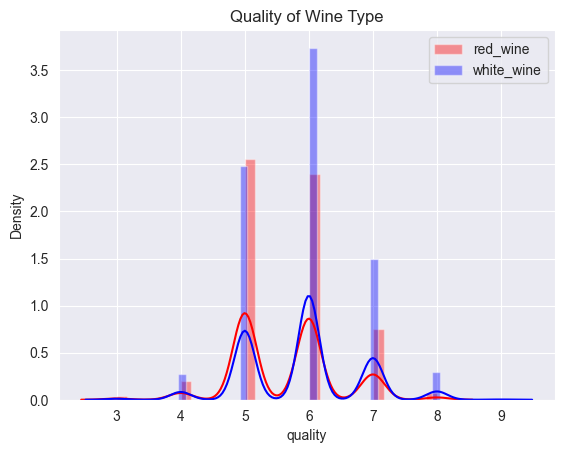

In [99]:
# 와인 Tpye별 품종의 밀집분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(red_df.quality, kde=True, label = 'red_wine', color='red')
sns.distplot(white_df.quality, kde=True, label = 'white_wine', color='blue')

plt.title('Quality of Wine Type')
plt.legend()
plt.show()

### 품질 분포: red - 5에 밀집  / white - 6에 밀집   => 평균적으로 white 와인의 품질이 더 좋은 품질을 가진다.
### 분포도: red - 5,6에 대부분의 데이터 밀집  /  white - 5,6,7에 많은 데이터 밀집   =>  red의 분포도가 더 낮음